# Piecewise polynomial (spline) approximation module _tfspline_
## Demo: Demonstrate options

Version 1.0
Date: 2022-06-09
Contact: hannes.waclawek@fh-salzburg.ac.at

In [36]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tfspline import model, plot, sampledata

In [37]:
# Spline config
n_segments = 2
degree = 5
ck = 2

In [38]:
# Optimization config
learning_rate = 0.1
epochs = 500
lambd = 1
gradient_regularization=True

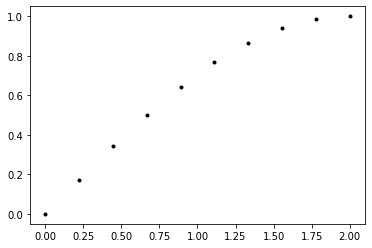

In [39]:
xss = np.linspace(0, 0.5*np.pi, 2000, dtype="double")

data_x = np.linspace(0, 0.5*np.pi, 10)
#data_x_norm /= data_x_norm[-1] # norm to 1
#data_x = data_x_norm[:]

data_y = np.sin(data_x)

data_x = sampledata.rescale_input_data(data_x, n_segments)

# Plot data
plt.plot(data_x, data_y, 'k.')

spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)

## Enable trace messages

In [40]:
spline.verbose = True

## Disable enforced continuity
By default, continuity will be established after optimization via corrective polynomials (See paper for details).
This can be deactivated.

In [41]:
spline.continuity= False

## Shifting polynomial centers
Experiments show that SGD optimization has a "radius of convergence" around the polynomial center.
This requires shifting of polynomial centers in order to allow optimization for higher x-value ranges.
_tfspline_ offers 3 options with a "usable" x-range of:
- ~1.75 without shifting of polynomial centers in total for all segments
- ~1.75 per segment for shifting mode "left boundary point", since only the right side of radius is usable
- ~3.5 per segment for shifting mode "mean", since both sides of radius are usable

If we take an x interval of [0, 2], as an example, and divide it into two equally sized segments:
- Without shifting polynomial centers, the second polynomial will diverge, since points lie outside the 1.75 radius
- With shifting to the left boundary point, both segments will converge
- With shifting to the mean of the segment, both segments will converge

Adding more optimization targets than just the approximation target further decreases the "radius of convergence".

#### No shifting

TensorFlow: Number of recognized GPUs:  0
Fitting took 5.846105575561523 seconds loss= infepoch=160, loss= infepoch=180, loss= infepoch=200, loss= infepoch=220, loss= infepoch=250, loss= nanepoch=270, loss= nanepoch=290, loss= nanepoch=310, loss= nanepoch=330, loss= nanepoch=350, loss= nanepoch=370, loss= nanepoch=390, loss= nanepoch=410, loss= nanepoch=440, loss= nanepoch=460, loss= nanepoch=490, loss= nan


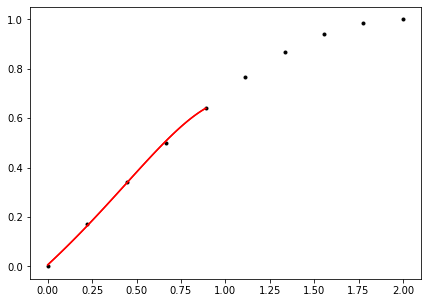

In [42]:
spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)
spline.verbose = True
spline.continuity= False
opt_sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.95, nesterov=True)

spline.fit(data_x, data_y, optimizer=opt_sgd, n_epochs=epochs, factor_approximation_quality=lambd,
factor_ck_pressure=1-lambd, shift_polynomial_centers='off')

plot.plot_spline(spline)

#### Shifting to left boundary point

TensorFlow: Number of recognized GPUs:  0
Fitting took 5.8764612674713135 seconds


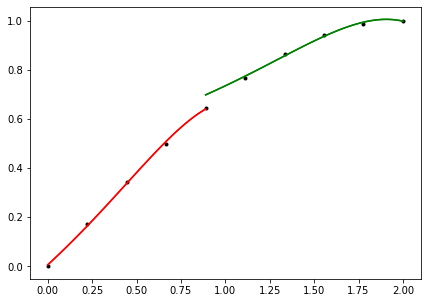

In [43]:
spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)
spline.verbose = True
spline.continuity= False

opt_sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.95, nesterov=True)

spline.fit(data_x, data_y, optimizer=opt_sgd, n_epochs=epochs, factor_approximation_quality=lambd,
factor_ck_pressure=1-lambd, shift_polynomial_centers='boundary')

plot.plot_spline(spline)

#### Shifting to mean of segment

TensorFlow: Number of recognized GPUs:  0
Fitting took 5.9244444370269775 seconds0.0445563epoch=50, loss=0.0149605epoch=70, loss=0.0041655epoch=90, loss=0.000910757epoch=110, loss=0.000613446epoch=130, loss=0.00050152epoch=150, loss=0.000365424epoch=180, loss=0.000264492epoch=200, loss=0.000212465epoch=220, loss=0.000171846epoch=240, loss=0.000140071epoch=260, loss=0.000114528epoch=280, loss=9.41524e-05epoch=300, loss=7.78884e-05epoch=320, loss=6.48755e-05epoch=340, loss=5.44644e-05epoch=370, loss=4.2606e-05epoch=390, loss=3.66259e-05epoch=410, loss=3.18274e-05epoch=430, loss=2.7972e-05epoch=460, loss=2.35524e-05epoch=490, loss=2.03482e-05


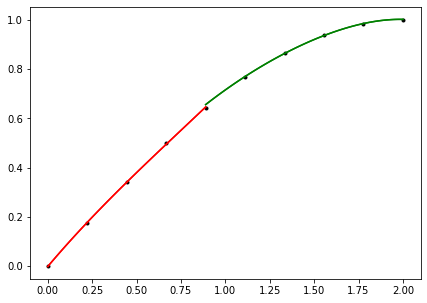

In [44]:
spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)
spline.verbose = True
spline.continuity= False

opt_sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.95, nesterov=True)

spline.fit(data_x, data_y, optimizer=opt_sgd, n_epochs=epochs, factor_approximation_quality=lambd,
factor_ck_pressure=1-lambd, shift_polynomial_centers='mean')

plot.plot_spline(spline)

## Segmentation methods
There are two ways available to split input data:
- Divide the input space into uniform segments (boundary point can be between two input data points)
- Divide the input space into non-uniform segments(boundary point always lies at input data point)

#### Uniform

TensorFlow: Number of recognized GPUs:  0
Fitting took 5.728131532669067 seconds


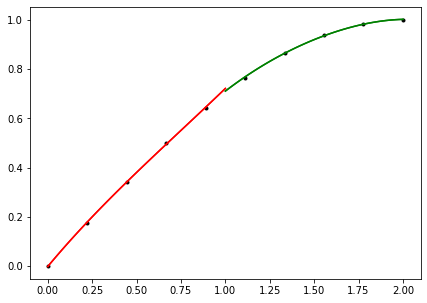

In [45]:
spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)
spline.verbose = True
spline.continuity= False

opt_sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.95, nesterov=True)

spline.fit(data_x, data_y, optimizer=opt_sgd, n_epochs=epochs, factor_approximation_quality=lambd,
factor_ck_pressure=1-lambd, uniform_split=True)

plot.plot_spline(spline)

#### Non-uniform

TensorFlow: Number of recognized GPUs:  0
Fitting took 5.5152366161346436 seconds


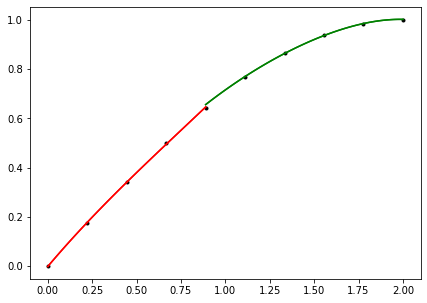

In [46]:
spline = model.Spline(polydegree=degree, polynum=n_segments, ck=ck)
spline.verbose = True
spline.continuity= False

opt_sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.95, nesterov=True)

spline.fit(data_x, data_y, optimizer=opt_sgd, n_epochs=epochs, factor_approximation_quality=lambd,
factor_ck_pressure=1-lambd, uniform_split=False)

plot.plot_spline(spline)

## Generate spline from coefficients

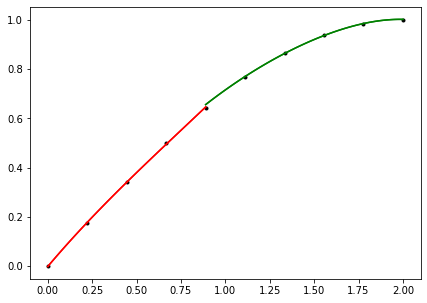

In [53]:
spline_new = model.get_spline_from_coeffs(spline.coeffs, data_x, data_y)

plot.plot_spline(spline_new)